<a href="https://colab.research.google.com/github/ameralhomdy/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [14]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [3]:
# TODO
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman.data


In [0]:
column_headers = ['age_of_patient', 'year_of_operation', 'positive_axillary_nodes', 
                  'survival_status']

df = pd.read_csv('haberman.data', names=column_headers)

In [5]:
df.shape

(306, 4)

In [7]:
df.isnull().sum()

age_of_patient             0
year_of_operation          0
positive_axillary_nodes    0
survival_status            0
dtype: int64

In [0]:
survived_over_5_years = ['1']
df['survival_status'] = df['survival_status'].isin(survived_over_5_years) * 1

In [110]:
df.head(10)

,age_of_patient,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [84]:
# TODO
age_bins = pd.cut(df['age_of_patient'], 5)
positive_axillary_bins = pd.cut(df['positive_axillary_nodes'], 5)
year_bins = pd.cut(df['year_of_operation'], 5)

crosstab1 = pd.crosstab(age_bins, [positive_axillary_bins, df['survival_status']])
crosstab1

positive_axillary_nodes (-0.052, 10.4]      ... (41.6, 52.0]   
survival_status                      0   1  ...            0  1
age_of_patient                              ...                
(29.947, 40.6]                       3  35  ...            0  0
(40.6, 51.2]                        22  63  ...            1  0
(51.2, 61.8]                        19  64  ...            0  1
(61.8, 72.4]                        11  40  ...            0  0
(72.4, 83.0]                         3   6  ...            0  0

[5 rows x 9 columns]

In [34]:
crosstab1_n = pd.crosstab(age_bins, [positive_axillary_bins, df['survival_status']], normalize='columns')
crosstab1_n

positive_axillary_nodes (-0.052, 10.4]            ... (41.6, 52.0]     
survival_status                      0         1  ...            0    1
age_of_patient                                    ...                  
(29.947, 40.6]                0.051724  0.168269  ...          0.0  0.0
(40.6, 51.2]                  0.379310  0.302885  ...          1.0  0.0
(51.2, 61.8]                  0.327586  0.307692  ...          0.0  1.0
(61.8, 72.4]                  0.189655  0.192308  ...          0.0  0.0
(72.4, 83.0]                  0.051724  0.028846  ...          0.0  0.0

[5 rows x 9 columns]

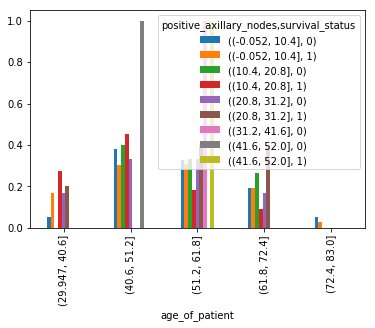

In [108]:
crosstab1_n.plot(kind='bar')

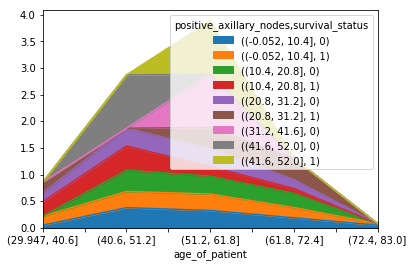

In [105]:
crosstab1_n.plot(kind='area')

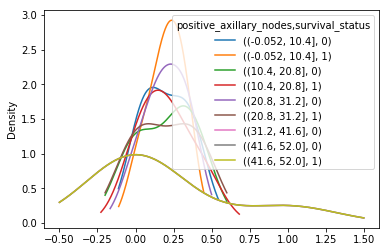

In [36]:
crosstab1_n.plot.density()

In [43]:
crosstab2 = pd.crosstab(age_bins, [year_bins, df['survival_status']])
crosstab2

year_of_operation (57.989, 60.2]     (60.2, 62.4]  ... (64.6, 66.8] (66.8, 69.0]    
survival_status                0   1            0  ...            1            0   1
age_of_patient                                     ...                              
(29.947, 40.6]                 1  19            0  ...            5            1   4
(40.6, 51.2]                  10  17            2  ...           13            5   8
(51.2, 61.8]                   6  21            5  ...            7            4  14
(61.8, 72.4]                   7   9            3  ...           11            1  10
(72.4, 83.0]                   1   0            0  ...            1            0   2

[5 rows x 10 columns]

In [44]:
crosstab2_n = pd.crosstab(age_bins, [year_bins, df['survival_status']], normalize='columns')
crosstab2_n

year_of_operation (57.989, 60.2]            ... (66.8, 69.0]          
survival_status                0         1  ...            0         1
age_of_patient                              ...                       
(29.947, 40.6]              0.04  0.287879  ...     0.090909  0.105263
(40.6, 51.2]                0.40  0.257576  ...     0.454545  0.210526
(51.2, 61.8]                0.24  0.318182  ...     0.363636  0.368421
(61.8, 72.4]                0.28  0.136364  ...     0.090909  0.263158
(72.4, 83.0]                0.04  0.000000  ...     0.000000  0.052632

[5 rows x 10 columns]

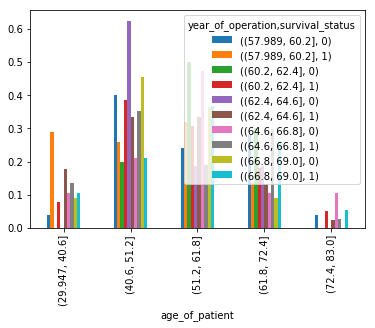

In [107]:
crosstab2_n.plot(kind='bar')

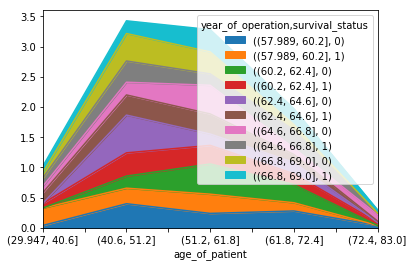

In [106]:
crosstab2_n.plot(kind='area')

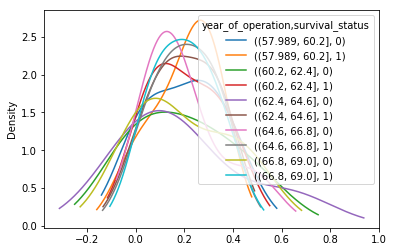

In [46]:
crosstab2_n.plot.density()

In [115]:
# These are some extra crosstabs and graphs

crosstab3 = pd.crosstab(positive_axillary_bins, df['survival_status'], normalize=True)
crosstab3

survival_status,0,1
positive_axillary_nodes,,
"(-0.052, 10.4]",0.189542,0.679739
"(10.4, 20.8]",0.049020,0.035948
"(20.8, 31.2]",0.019608,0.016340
"(31.2, 41.6]",0.003268,0.000000
"(41.6, 52.0]",0.003268,0.003268


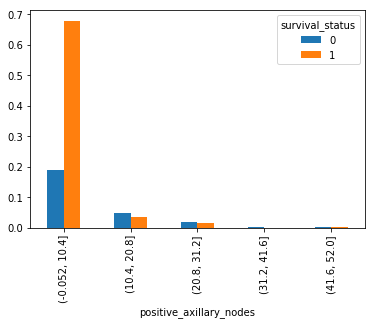

In [116]:
crosstab3.plot(kind='bar')

In [117]:
crosstab4 = pd.crosstab(year_bins, df['survival_status'], normalize=True)
crosstab4

survival_status,0,1
year_of_operation,,
"(57.989, 60.2]",0.081699,0.215686
"(60.2, 62.4]",0.032680,0.127451
"(62.4, 64.6]",0.052288,0.147059
"(64.6, 66.8]",0.062092,0.120915
"(66.8, 69.0]",0.035948,0.124183


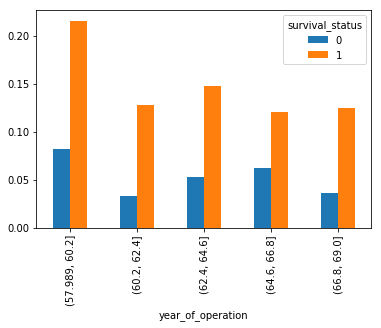

In [118]:
crosstab4.plot(kind='bar')

In [119]:
crosstab5 = pd.crosstab(age_bins, df['survival_status'], normalize=True)
crosstab5

survival_status,0,1
age_of_patient,,
"(29.947, 40.6]",0.013072,0.127451
"(40.6, 51.2]",0.101307,0.222222
"(51.2, 61.8]",0.088235,0.225490
"(61.8, 72.4]",0.052288,0.140523
"(72.4, 83.0]",0.009804,0.019608


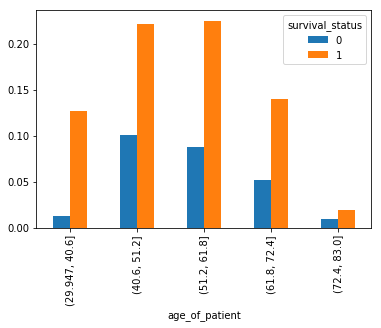

In [120]:
crosstab5.plot(kind='bar')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [47]:
# TODO
survived = df['survival_status'] == 1
df_survived = df.loc[survived]

df_survived.head(10)

,age_of_patient,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [109]:
didnot_survive = df['survival_status'] == 0
df_died = df.loc[didnot_survive] 

df_died.head(10)

,age_of_patient,year_of_operation,positive_axillary_nodes,survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


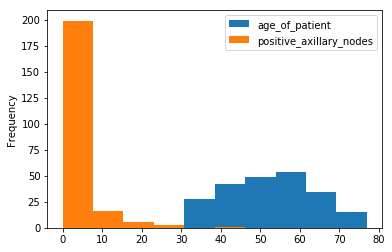

In [71]:
df_survived_copy = df_survived.iloc[:,[0,2]]
df_survived_copy.plot(kind='hist')

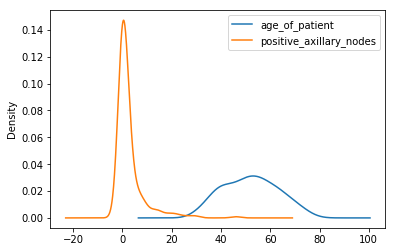

In [64]:
df_survived_copy.plot.density()

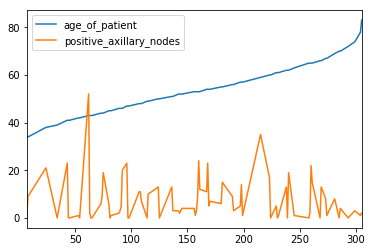

In [65]:
df_died_copy = df_died.iloc[:,[0,2]]
df_died_copy.plot()

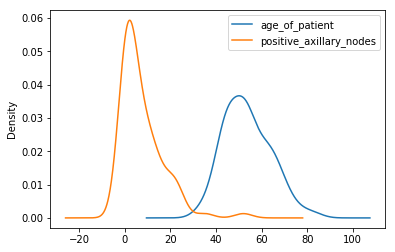

In [66]:
df_died_copy.plot.density()

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- I noticed as the year of opertion goes up the survival rate goes up
- I also noticed that as the number of positive axillary nodes detected or the age of patient goes down the survival rate goes up
- They are considered confounding variables as they change it changes the results of the outcome

In [0]:
# Any Supplemental Code for Analysis Here